In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [20]:
# Load the Wiki page
url = "https://en.wikipedia.org/wiki/Polling_for_United_States_presidential_elections"
response = requests.get(url)
soup = BeautifulSoup(response.content)

response.status_code

200

In [21]:
# get tables in wikitable class
tables = soup.find_all("table", class_="wikitable")

In [22]:
# Load the 1936 table manually by index
df_1 = pd.read_html(str(tables[0]))[0]

df_1.head()

/var/folders/t1/nb2p0ppn0t1fldv4wgzvfrtw0000gn/T/ipykernel_20883/279619938.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_1 = pd.read_html(str(tables[0]))[0]


,Month,Franklin D. Roosevelt (D) %,Alf Landon (R) %
0,July,49%,45%
1,August,49%,45%
2,August,49%,45%
3,August,49%,44%
4,September,49%,45%


My priority is consistency across all years and since only some years have this sample size and margin of error data in this dataset
I am choosing to exclude it for fairness.
All my datasets will only have the poll_democrat, poll_republican, poll_leader_margin and poll_leader columns for analysys

In [23]:
# Rename columns for consistency
df_1 = df_1.rename(columns={
    df_1.columns[1]: 'Democratic',
    df_1.columns[2]: 'Republican'
})

df_1.head()

,Month,Democratic,Republican
0,July,49%,45%
1,August,49%,45%
2,August,49%,45%
3,August,49%,44%
4,September,49%,45%


In [24]:
df_1.dtypes

Month         object
Democratic    object
Republican    object
dtype: object

In [25]:
# Convert to float 
df_1['Democratic'] = df_1['Democratic'].str.replace('%', '').astype(float)
df_1['Republican'] = df_1['Republican'].str.replace('%', '').astype(float)

In [26]:
df_1.dtypes

Month          object
Democratic    float64
Republican    float64
dtype: object

In [27]:
# Create Poll_Leading_Margin (absolute difference)
df_1['Poll_Leading_Margin'] = abs(df_1['Democratic'] - df_1['Republican'])

In [28]:
# Create Poll_Leader (0 = Democrat leads, 1 = Republican leads)
df_1['Poll_Leader'] = (df_1['Republican'] > df_1['Democratic']).astype(int)

In [29]:
df_1.dtypes

Month                   object
Democratic             float64
Republican             float64
Poll_Leading_Margin    float64
Poll_Leader              int64
dtype: object

In [30]:
df_1.head(20)

,Month,Democratic,Republican,Poll_Leading_Margin,Poll_Leader
0,July,49.0,45.00,4.00,0
1,August,49.0,45.00,4.00,0
2,August,49.0,45.00,4.00,0
3,August,49.0,44.00,5.00,0
4,September,49.0,45.00,4.00,0
5,September,50.0,44.00,6.00,0
6,October,51.0,44.00,7.00,0
7,October,51.0,44.00,7.00,0
8,October,56.0,44.00,12.00,0
9,Actual result,60.8,36.54,24.26,0


In [31]:
#Drop Row 9 and row 10 
df_1 = df_1.drop(index=[9, 10])
df_1.reset_index(drop=True, inplace=True)  

df_1.tail()

,Month,Democratic,Republican,Poll_Leading_Margin,Poll_Leader
4,September,49.0,45.0,4.0,0
5,September,50.0,44.0,6.0,0
6,October,51.0,44.0,7.0,0
7,October,51.0,44.0,7.0,0
8,October,56.0,44.0,12.0,0


In [32]:
df_1.dtypes

Month                   object
Democratic             float64
Republican             float64
Poll_Leading_Margin    float64
Poll_Leader              int64
dtype: object

In [33]:
# Add year 1936 column at the start
df_1.insert(0, 'year', 1936)

df_1.head()

,year,Month,Democratic,Republican,Poll_Leading_Margin,Poll_Leader
0,1936,July,49.0,45.0,4.0,0
1,1936,August,49.0,45.0,4.0,0
2,1936,August,49.0,45.0,4.0,0
3,1936,August,49.0,44.0,5.0,0
4,1936,September,49.0,45.0,4.0,0


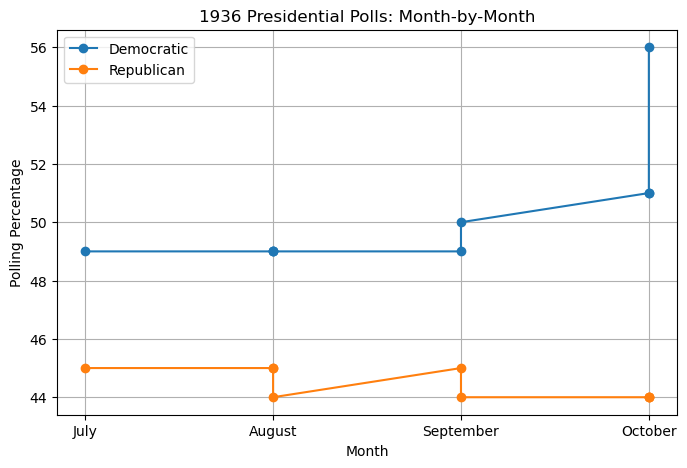

In [38]:
import matplotlib.pyplot as plt

# Filter for a specific year, e.g., 1936
df_1936 = df_1[df_1['year'] == 1936].copy()

# If you need to add months (see above), do so here

plt.figure(figsize=(8,5))
plt.plot(df_1936['Month'], df_1936['Democratic'], marker='o', label='Democratic')
plt.plot(df_1936['Month'], df_1936['Republican'], marker='o', label='Republican')
plt.xlabel('Month')
plt.ylabel('Polling Percentage')
plt.title('1936 Presidential Polls: Month-by-Month')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
df_1.to_csv("1936_Opinion_Polling_Data.csv", index=False)